Member: (50 pts)

    Task-1 Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

    m

    Task-3 Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates 
    differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

    Task-4 Identify 3 counties within a state of your choice with high cases and death rates.

    Task-5 Plot weekly trends (new cases and deaths) for the top 3 infected counties. 

    Task-6 Show plots by raw values and log normalized values. 

    Task-7 Describe what is causing them and what were the peaks. Do the counties follow state pattern.

# Project Stage - II (Data Modeling)

COVID data in the second half year of 2022, that is, from 6/1/2022 to 12/31/2022.*

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats
import plotly.express as px
from IPython.display import Image

In [2]:
Super_covid=pd.read_csv("C:/Users/prati/OneDrive/Desktop/605/2k23/Project Stage - I/Project Stage-2/data/Super_covid.csv")
#importing Super covid dataset
Super_covid


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0,0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0,0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0,0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
3483558,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3483559,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3483560,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3483561,56045,Weston County,WY,56,2023-01-15,1881,22,6927


As per stage-1 review we also have to eliminates rows wchich have Cpunty namen as Statewide Unallocated.


In [3]:
Super_covid = Super_covid[Super_covid['County Name'] != 'Statewide Unallocated']
Super_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1091,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1092,1001,Autauga County,AL,1,2020-01-23,0,0,55869
1093,1001,Autauga County,AL,1,2020-01-24,0,0,55869
1094,1001,Autauga County,AL,1,2020-01-25,0,0,55869
1095,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3483558,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3483559,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3483560,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3483561,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [4]:
Super_covid.dtypes


countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Date           object
Cases           int64
Death           int64
population      int64
dtype: object

Here we have Date in form of object we have to  change them to date and time form.

In [5]:
Super_covid['Date'] = pd.to_datetime(Super_covid.Date)
Super_covid.dtypes

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\2036911110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Super_covid['Date'] = pd.to_datetime(Super_covid.Date)


countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Date           datetime64[ns]
Cases                   int64
Death                   int64
population              int64
dtype: object

As per rerquirement of stage-2 : we have to filter it on range of COVID data in the second half year of 2022, 
that is, from 6/1/2022 to 12/31/2022.*

In [6]:

Second_half_2022 = Super_covid.loc[(Super_covid['Date'] >= '2022-06-1') & (Super_covid['Date'] <'2022-12-31')]
Second_half_2022

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1952,1001,Autauga County,AL,1,2022-06-01,15969,216,55869
1953,1001,Autauga County,AL,1,2022-06-02,15978,216,55869
1954,1001,Autauga County,AL,1,2022-06-03,15978,216,55869
1955,1001,Autauga County,AL,1,2022-06-04,15978,216,55869
1956,1001,Autauga County,AL,1,2022-06-05,15978,216,55869
...,...,...,...,...,...,...,...,...
3483541,56045,Weston County,WY,56,2022-12-26,1876,22,6927
3483542,56045,Weston County,WY,56,2022-12-27,1876,22,6927
3483543,56045,Weston County,WY,56,2022-12-28,1876,22,6927
3483544,56045,Weston County,WY,56,2022-12-29,1876,22,6927


    I took California as my base state .


    As per Selecting 3 other state as 
        New Jersy, 
        Florida, 
        Nevada 

State-1 for California

In [7]:
Cali = Second_half_2022[Second_half_2022['State'] == "CA"] 
#apply filter on super dataset for only CA state data and store in Cali variable.  
Cali

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329
...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668


In [8]:
#Cali = Cali.groupby(["Date"]).sum().reset_index()
#Cali

In [9]:
Cali['Case/Day'] = Cali['Cases'].diff()
Cali['Death/Day'] = Cali['Death'].diff()
Cali

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3600011492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cali['Case/Day'] = Cali['Cases'].diff()
C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3600011492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cali['Death/Day'] = Cali['Death'].diff()


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,NaN,NaN
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


In [10]:
Cali= Cali[Cali['Date'] != '2022-06-01']
Cali

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


# Moving toward task-1
    Task-1 Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

After adding column for weekly case and death in dataframe we have to find Case and death mean mode and median value.  

In [11]:
Cali_d = Cali.groupby([pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean','Death/Day':'mean'}).round().reset_index()
Cali_d

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3063180724.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cali_d = Cali.groupby([pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean','Death/Day':'mean'}).round().reset_index()


,Date,Case/Day,Death/Day
0,2022-06-05,8.0,0.0
1,2022-06-12,439.0,1.0
2,2022-06-19,276.0,1.0
3,2022-06-26,236.0,0.0
4,2022-07-03,373.0,2.0
5,2022-07-10,305.0,1.0
6,2022-07-17,284.0,-1.0
7,2022-07-24,253.0,0.0
8,2022-07-31,273.0,1.0
9,2022-08-07,221.0,1.0


In [12]:
cali_mean_day=Cali['Case/Day'].agg(['mean'])
cali_mean_day

mean    154.402977
Name: Case/Day, dtype: float64

In [13]:
cali_median_day=Cali['Case/Day'].agg(['median'])
cali_median_day

median    0.0
Name: Case/Day, dtype: float64

In [14]:
Cali['Case/Day'].mode()

0    0.0
Name: Case/Day, dtype: float64

In [15]:
Cali['Death/Day'].agg(['mean','median'])

mean      0.564005
median    0.000000
Name: Death/Day, dtype: float64

In [16]:
Cali['Death/Day'].mode()

0    0.0
Name: Death/Day, dtype: float64

# Task-2 
    
    Compare the data against 3 other states. Normalize by population, use a normalization factor which is able 
    to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). 

    For selecting other 3 states such as 
        Florida, 
        New Jersy, 
        Nevada

In [40]:
CC=Second_half_2022[Second_half_2022['State'].isin(['MI'])]
CC

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1367884,26001,Alcona County,MI,26,2022-06-01,1767,71,10405
1367885,26001,Alcona County,MI,26,2022-06-02,1767,71,10405
1367886,26001,Alcona County,MI,26,2022-06-03,1767,71,10405
1367887,26001,Alcona County,MI,26,2022-06-04,1767,71,10405
1367888,26001,Alcona County,MI,26,2022-06-05,1767,71,10405
...,...,...,...,...,...,...,...,...
1457554,26165,Wexford County,MI,26,2022-12-26,8511,124,33631
1457555,26165,Wexford County,MI,26,2022-12-27,8511,124,33631
1457556,26165,Wexford County,MI,26,2022-12-28,8546,124,33631
1457557,26165,Wexford County,MI,26,2022-12-29,8546,124,33631


In [41]:
Comp_states=Second_half_2022[Second_half_2022['State'].isin(['CA','MI','NV','NJ'])]
Comp_states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329
...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267


In [42]:
Comp_states['Case/Day'] = Comp_states['Cases'].diff()
Comp_states['Death/Day'] = Comp_states['Death'].diff()
Comp_states

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3871429336.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3871429336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,NaN,NaN
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0


In [43]:
Comp_states= Comp_states[Comp_states['Date'] != '2022-06-01']
Comp_states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0


In [44]:
#Comp_states = Comp_states.groupby(["State","Date"]).sum().reset_index()
#Comp_states

# For Total Normalization of Case and Death
by population

In [45]:
Comp_states['Case/Day_Nor'] = (Comp_states['Case/Day']/Comp_states['population'])*10000
Comp_states['Death/Day_Nor'] = (Comp_states['Death/Day']/Comp_states['population'])*10000
Comp_states

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3839610558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\3839610558.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day,Case/Day_Nor,Death/Day_Nor
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0,0.658159,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0,0.000000,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0,0.000000,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0,0.000000,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0,23.113343,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0,0.000000,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0,0.000000,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0,0.000000,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0,0.000000,0.0


In [46]:
Comp_states_case_death = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean',
                                                                                                'Death/Day' :'mean'}).reset_index()
Comp_states_case_death

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\952453200.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State,Date,Case/Day,Death/Day
0,CA,2022-06-05,7.750000,0.000000
1,CA,2022-06-12,439.315271,0.716749
2,CA,2022-06-19,275.544335,0.743842
3,CA,2022-06-26,235.864532,0.266010
4,CA,2022-07-03,373.160099,2.290640
...,...,...,...,...
119,NV,2022-12-04,22.084034,0.050420
120,NV,2022-12-11,32.201681,0.226891
121,NV,2022-12-18,24.075630,0.168067
122,NV,2022-12-25,19.966387,0.235294


In [47]:

Comp_states_Nor = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day_Nor','Death/Day_Nor'].agg({'Case/Day_Nor':'mean',
                                                                                                'Death/Day_Nor' :'mean'}).reset_index()
Comp_states_Nor

C:\Users\prati\AppData\Local\Temp\ipykernel_16596\2154971253.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State,Date,Case/Day_Nor,Death/Day_Nor
0,CA,2022-06-05,0.160469,0.000000
1,CA,2022-06-12,5.205105,0.008846
2,CA,2022-06-19,3.268038,0.008977
3,CA,2022-06-26,2.867322,0.004678
4,CA,2022-07-03,4.487234,0.036765
...,...,...,...,...
119,NV,2022-12-04,1.008064,0.000222
120,NV,2022-12-11,1.268347,0.018347
121,NV,2022-12-18,1.025682,0.001024
122,NV,2022-12-25,0.780563,0.003231


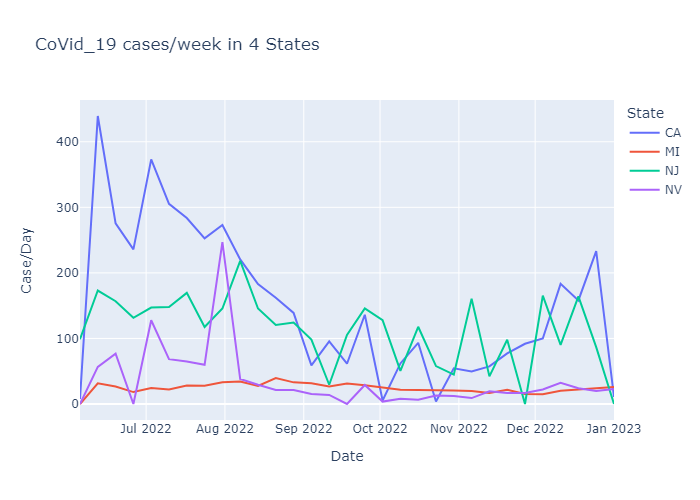

In [57]:
IMG = px.line(Comp_states_case_death, x="Date", y="Case/Day", color='State', title="CoVid_19 cases/week in 4 States")
IMG_1= IMG.to_image(format="png")
Image(IMG_1)

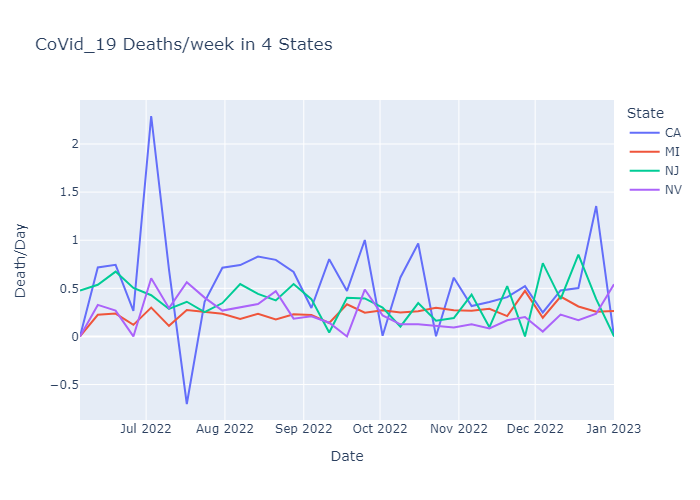

In [56]:
IMG = px.line(Comp_states_case_death, x="Date", y="Death/Day", color='State', title="CoVid_19 Deaths/week in 4 States")
IMG_2= IMG.to_image(format="png")
Image(IMG_2)

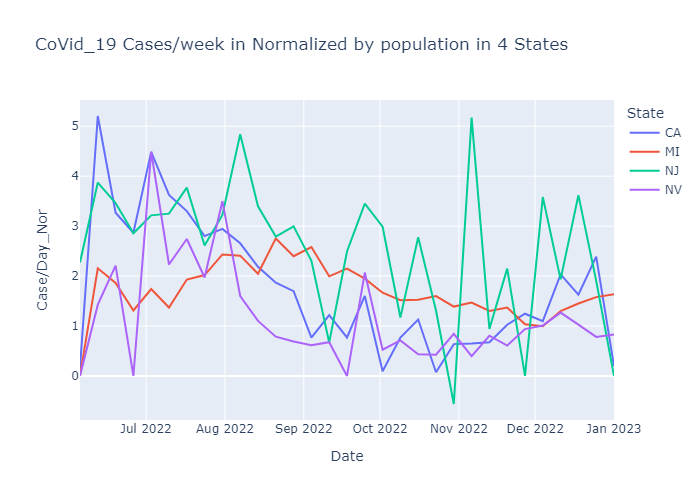

In [55]:
IMG = px.line(Comp_states_Nor, x="Date", y="Case/Day_Nor", color='State', title="CoVid_19 Cases/week in Normalized by population in 4 States")
IMG_3= IMG.to_image(format="png")
Image(IMG_3)

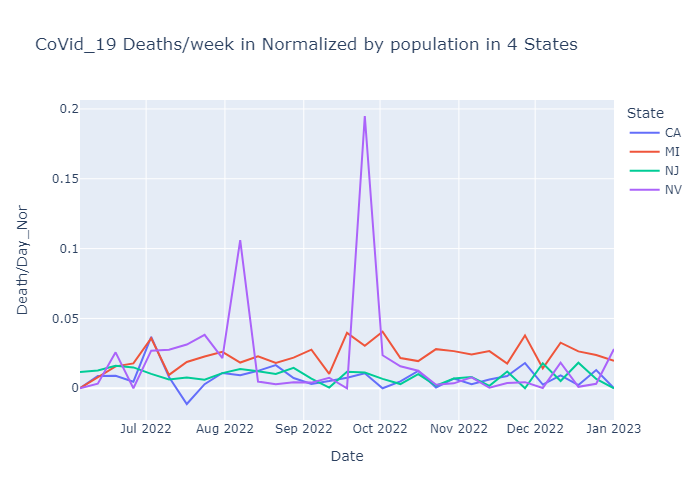

In [54]:
IMG = px.line(Comp_states_Nor, x="Date", y="Death/Day_Nor", color='State', title="CoVid_19 Deaths/week in Normalized by population in 4 States")
IMG_4= IMG.to_image(format="png")
Image(IMG_4)